In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("NBA_TeamStats_1992-2024_df.csv")

df.head()


,Rk,Year,Team,Playoffs,Championship,Age,W,L,PW,PL,...,3PAr,TS%,eFG%,TOV%,ORB%,FT/FGA,eFG%.1,TOV%.1,DRB%,FT/FGA.1
0,1,1992,Chicago Bulls,1,1,27.6,67,15,66,16,...,0.063,0.556,0.518,11.8,35.1,0.221,0.476,14.1,69.3,0.219
1,2,1992,Portland Trail Blazers,1,0,28.1,57,25,59,23,...,0.128,0.541,0.495,13.6,35.6,0.253,0.471,14.3,69.9,0.251
2,3,1992,Utah Jazz,1,0,28.5,55,27,57,25,...,0.067,0.557,0.504,13.7,32.7,0.286,0.475,13.0,68.9,0.214
3,4,1992,Phoenix Suns,1,0,27.0,53,29,56,26,...,0.083,0.556,0.508,13.1,31.7,0.258,0.471,13.0,67.7,0.223
4,5,1992,Cleveland Cavaliers,1,0,27.6,57,25,55,27,...,0.101,0.557,0.506,11.8,30.5,0.259,0.483,12.3,66.5,0.174


In [57]:
# # Rename the columns needed
df=pd.read_csv("NBA_TeamStats_1992-2024_df.csv")
df_renamed = df.rename(columns={
                                        "Rk": "RANK",
                                        "W": "WINS",
                                        "L": "LOSSES",
                                        "PW": "PYTHAGOREAN WINS",
                                        "PL": "PYTHAGOREAN LOSSES",
                                        "MOV": "MARGIN OF VICTORY",
                                        "SOS": "STRENGTH OF SCHEDULE",
                                        "SRS": "SIMPLE RATING SYSTEM",
                                        "ORtg": "OFFENSIVE RATING",
                                        "DRtg": "DEFENSIVE RATING",
                                        "Pace": "PACE FACTOR",
                                        "FTr": "FREE THROW ATTEMPT RATE",
                                        "3PAr": "3-POINT ATTEMPT RATE",
                                        "TS%": "TRUE SHOOTING PERCENTAGE",
                                        "eFG%": "EFFECTIVE FIELD GOAL PERCENTAGE",
                                        "TOV%": "TURNOVER PERCENTAGE",
                                        "ORB%": "OFFENSIVE REBOUND PERCENTAGE",
                                        "FT/FGA": "FREE THROWS PER FIELD GOAL ATTEMPT",
                                        "eFG%": "OPPONENT EFFECTIVE FIELD GOAL PERCENTAGE",
                                        "TOV%": "OPPONENT TURNOVER PERCENTAGE",
                                        "DRB%": "DEFENSIVE REBOUND PERCENTAGE",
                                        "FT/FGA": "OPPONENT FREE THROWS PER FIELD GOAL ATTEMPT",
                                         })


df_renamed.head()

,RANK,Year,Team,Playoffs,Championship,Age,WINS,LOSSES,PYTHAGOREAN WINS,PYTHAGOREAN LOSSES,...,3-POINT ATTEMPT RATE,TRUE SHOOTING PERCENTAGE,OPPONENT EFFECTIVE FIELD GOAL PERCENTAGE,OPPONENT TURNOVER PERCENTAGE,OFFENSIVE REBOUND PERCENTAGE,OPPONENT FREE THROWS PER FIELD GOAL ATTEMPT,eFG%.1,TOV%.1,DEFENSIVE REBOUND PERCENTAGE,FT/FGA.1
0,1,1992,Chicago Bulls,1,1,27.6,67,15,66,16,...,0.063,0.556,0.518,11.8,35.1,0.221,0.476,14.1,69.3,0.219
1,2,1992,Portland Trail Blazers,1,0,28.1,57,25,59,23,...,0.128,0.541,0.495,13.6,35.6,0.253,0.471,14.3,69.9,0.251
2,3,1992,Utah Jazz,1,0,28.5,55,27,57,25,...,0.067,0.557,0.504,13.7,32.7,0.286,0.475,13.0,68.9,0.214
3,4,1992,Phoenix Suns,1,0,27.0,53,29,56,26,...,0.083,0.556,0.508,13.1,31.7,0.258,0.471,13.0,67.7,0.223
4,5,1992,Cleveland Cavaliers,1,0,27.6,57,25,55,27,...,0.101,0.557,0.506,11.8,30.5,0.259,0.483,12.3,66.5,0.174


In [75]:
#df_renamed.replace('Null', np.nan).dropna()

df_renamed.drop(df_renamed.columns[2], axis=1, inplace=True)

df_renamed.corr()

,RANK,Year,Age,WINS,LOSSES,PYTHAGOREAN WINS,PYTHAGOREAN LOSSES,MARGIN OF VICTORY,STRENGTH OF SCHEDULE,SIMPLE RATING SYSTEM,...,3-POINT ATTEMPT RATE,TRUE SHOOTING PERCENTAGE,OPPONENT EFFECTIVE FIELD GOAL PERCENTAGE,OPPONENT TURNOVER PERCENTAGE,OFFENSIVE REBOUND PERCENTAGE,OPPONENT FREE THROWS PER FIELD GOAL ATTEMPT,eFG%.1,TOV%.1,DEFENSIVE REBOUND PERCENTAGE,FT/FGA.1
RANK,1.000000,0.044827,-0.506755,-0.914204,0.910829,-0.937448,0.932998,-0.966694,0.386491,-0.964080,...,-0.073312,-0.472147,-0.426055,0.233541,-0.059118,-0.202472,0.422020,-0.095406,-0.164059,0.178750
Year,0.044827,1.000000,-0.260907,-0.006903,-0.006936,-0.009596,-0.004555,-0.001363,-0.001421,-0.001565,...,0.848223,0.544969,0.612489,-0.543673,-0.770300,-0.530049,0.649404,-0.514238,0.842065,-0.506471
Age,-0.506755,-0.260907,1.000000,0.503116,-0.517899,0.479865,-0.494301,0.505629,-0.221690,0.502660,...,-0.134585,0.124098,0.081399,-0.010214,0.083445,0.208923,-0.417153,0.109315,-0.078420,-0.064649
WINS,-0.914204,-0.006903,0.503116,1.000000,-0.867882,0.972276,-0.835882,0.933366,-0.370674,0.931052,...,0.088901,0.503379,0.457474,-0.275394,0.023345,0.184641,-0.363186,0.052257,0.188290,-0.189072
LOSSES,0.910829,-0.006936,-0.517899,-0.867882,1.000000,-0.838047,0.972017,-0.930957,0.373851,-0.928296,...,-0.109440,-0.449333,-0.411082,0.241076,-0.014369,-0.164040,0.409704,-0.085179,-0.196784,0.209704
PYTHAGOREAN WINS,-0.937448,-0.009596,0.479865,0.972276,-0.838047,1.000000,-0.861683,0.960247,-0.383976,0.957647,...,0.089630,0.508966,0.460598,-0.281623,0.034755,0.195547,-0.372286,0.072488,0.195716,-0.171314
PYTHAGOREAN LOSSES,0.932998,-0.004555,-0.494301,-0.835882,0.972017,-0.861683,1.000000,-0.956774,0.386833,-0.953821,...,-0.110531,-0.453121,-0.412626,0.246225,-0.025590,-0.174301,0.419458,-0.106166,-0.204206,0.192125
MARGIN OF VICTORY,-0.966694,-0.001363,0.505629,0.933366,-0.930957,0.960247,-0.956774,1.000000,-0.403104,0.997017,...,0.102853,0.505018,0.458359,-0.272054,0.032868,0.191399,-0.411088,0.086207,0.205950,-0.188534
STRENGTH OF SCHEDULE,0.386491,-0.001421,-0.221690,-0.370674,0.373851,-0.383976,0.386833,-0.403104,1.000000,-0.331280,...,-0.044218,-0.164461,-0.150571,0.103319,0.036060,-0.074678,0.216405,-0.060939,-0.116858,0.054979
SIMPLE RATING SYSTEM,-0.964080,-0.001565,0.502660,0.931052,-0.928296,0.957647,-0.953821,0.997017,-0.331280,1.000000,...,0.102276,0.506796,0.459870,-0.271768,0.036947,0.191013,-0.405590,0.083811,0.202409,-0.189773


<Axes: ylabel='Frequency'>

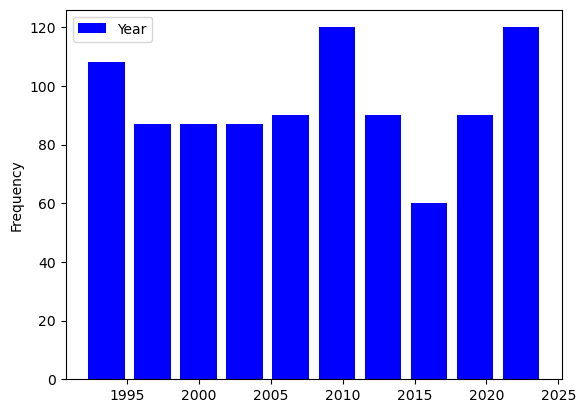

In [4]:
df_year = df_renamed[["Year"]]
df_year.plot.hist(color="blue",rwidth=0.8) 


In [59]:
df_won_champ = df_renamed.loc[(df_renamed["Championship"].str.contains("1"))]

df_won_champ.head()

,RANK,Year,Team,Playoffs,Championship,Age,WINS,LOSSES,PYTHAGOREAN WINS,PYTHAGOREAN LOSSES,...,3-POINT ATTEMPT RATE,TRUE SHOOTING PERCENTAGE,OPPONENT EFFECTIVE FIELD GOAL PERCENTAGE,OPPONENT TURNOVER PERCENTAGE,OFFENSIVE REBOUND PERCENTAGE,OPPONENT FREE THROWS PER FIELD GOAL ATTEMPT,eFG%.1,TOV%.1,DEFENSIVE REBOUND PERCENTAGE,FT/FGA.1
0,1,1992,Chicago Bulls,1,1,27.6,67,15,66,16,...,0.063,0.556,0.518,11.8,35.1,0.221,0.476,14.1,69.3,0.219
28,2,1993,Chicago Bulls,1,1,28.1,57,25,58,24,...,0.093,0.535,0.499,12.0,36.3,0.199,0.493,15.4,68.7,0.239
60,7,1994,Houston Rockets,1,1,28.1,58,24,53,29,...,0.191,0.545,0.507,15.0,27.6,0.218,0.458,13.3,69.7,0.192
91,11,1995,Houston Rockets,1,1,28.5,47,35,47,35,...,0.267,0.568,0.529,15.0,26.9,0.232,0.489,13.9,67.7,0.199
108,1,1996,Chicago Bulls,1,1,29.9,72,10,70,12,...,0.196,0.555,0.517,13.1,36.9,0.217,0.482,16.1,71.1,0.222


In [35]:
by_win = df_won_champ.groupby('Championship')
by_win["Team"].value_counts()

team_counts = by_win["Team"].value_counts()

team_counts_by_win = team_counts.reset_index()
team_counts_by_win.columns = ["Championship",'Team', 'Count']

team_counts_by_win


,Championship,Team,Count
0,Yes,Los Angeles Lakers,6
1,Yes,Chicago Bulls,5
2,Yes,San Antonio Spurs,5
3,Yes,Golden State Warriors,4
4,Yes,Miami Heat,3
5,Yes,Houston Rockets,2
6,Yes,Boston Celtics,1
7,Yes,Dallas Mavericks,1
8,Yes,Denver Nuggets,1
9,Yes,Detroit Pistons,1


In [48]:
by_team = team_counts_by_win.drop(columns=['Championship'])

by_team

,Team,Count
0,Los Angeles Lakers,6
1,Chicago Bulls,5
2,San Antonio Spurs,5
3,Golden State Warriors,4
4,Miami Heat,3
5,Houston Rockets,2
6,Boston Celtics,1
7,Dallas Mavericks,1
8,Denver Nuggets,1
9,Detroit Pistons,1


Text(0.5, 1.0, 'Championships won by team')

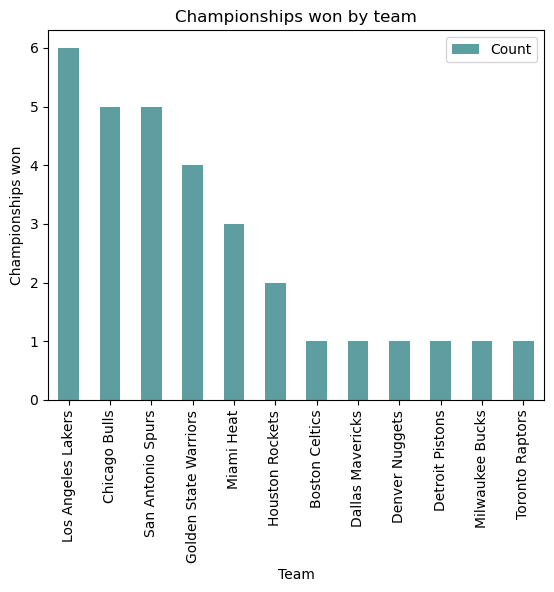

In [51]:
#Team vs age 

by_team.plot(x='Team', y='Count', kind='bar', color= "cadetblue")


plt.xlabel('Team')
plt.ylabel('Championships won')
plt.title('Championships won by team')


In [7]:
df_team_age = df_won_champ[["Team" , "Age"]]

df_team_age

,Team,Age
0,Chicago Bulls,27.6
28,Chicago Bulls,28.1
60,Houston Rockets,28.1
91,Houston Rockets,28.5
108,Chicago Bulls,29.9
137,Chicago Bulls,30.7
168,Chicago Bulls,31.7
195,San Antonio Spurs,30.1
224,Los Angeles Lakers,29.2
260,Los Angeles Lakers,29.2


Text(0.5, 1.0, 'Team vs Age')

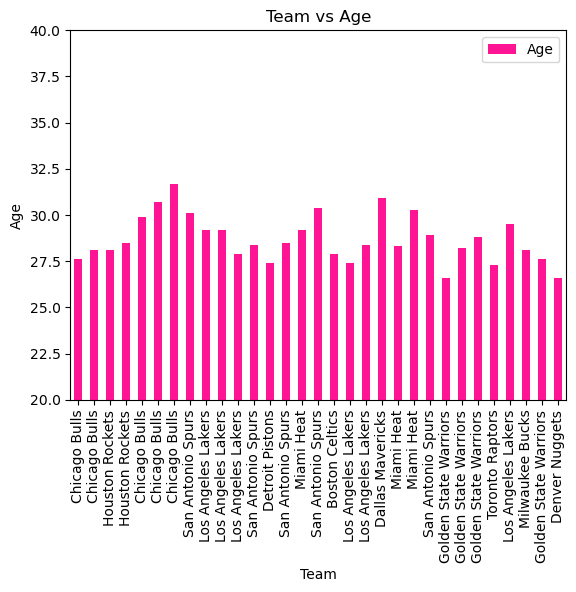

In [8]:
#Team vs age 
df_team_age = df_won_champ[["Team" , "Age"]]

df_team_age.plot(x='Team', y='Age', kind='bar', color= "deeppink")

plt.ylim(20, 40)  
plt.xlabel('Team')
plt.ylabel('Age')
plt.title('Team vs Age')



In [12]:
#Plot year - team - championship
df_team_age_c = df_won_champ[["Team" , "Age", "Championship"]]
#plt.figure()
#sns.heatmap()
#plt.xlabel()
#plt.ylabel()
#plt..title()
#plt.show()

df_team_age_c

,Team,Age,Championship
0,Chicago Bulls,27.6,Yes
28,Chicago Bulls,28.1,Yes
60,Houston Rockets,28.1,Yes
91,Houston Rockets,28.5,Yes
108,Chicago Bulls,29.9,Yes
137,Chicago Bulls,30.7,Yes
168,Chicago Bulls,31.7,Yes
195,San Antonio Spurs,30.1,Yes
224,Los Angeles Lakers,29.2,Yes
260,Los Angeles Lakers,29.2,Yes


Text(0.5, 1.0, 'Age vs Wins')

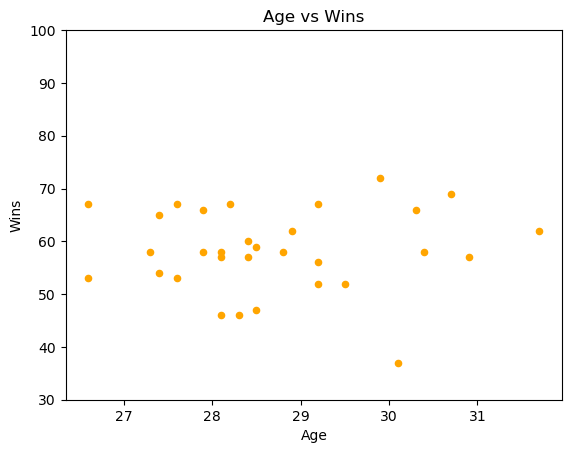

In [10]:
#Team vs age 
df_age_wins = df_won_champ[["Age" , "WINS"]]

df_age_wins.plot.scatter(x='Age', y='WINS', color= "orange")

plt.ylim(30, 100) 
plt.xlabel('Age')
plt.ylabel('Wins')
plt.title('Age vs Wins')

In [11]:
df_age_wins = df_won_champ[["Age" , "WINS"]]